<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF-280 - Estadística Computacional </h1>
    <h2> Transformación de variables aleatorias y Vectores aleatorios </h2>
    <h4> Diego Quezada </h4>
</center>

## Contenidos

* [Introducción](#intro)
* [Reglamento](#rules)
* [Experiencia](#experience)
    * [Transformación de variables aleatorias](#transformation)
    * [Introducción a los vectores aleatorios](#randomvectors)
    * [Distribuciones multivariadas](#multivariates)

<div id='intro' />

## Introducción

Los laboratorios de estadística computacional (LEC) tienen por objetivo principal analizar datos utilizando técnicas de visualización y evidenciar el comportamiento estocástico de experimentos aleatorios mediante simulaciones computacionales. Las experiencias buscan medir la habilidad de programación en Python y sus librerías, la capacidad de análisis estadístico y la comprensión de documentación, artículos y papers.

Recuerde que los laboratorios tienen una ponderación de 25% en la nota final del ramo.

<div id='rules' />

## Reglamento

1. El desarrollo de los laboratorios debe ser en **Python**.
2. El formato de entrega es un **archivo .ipynb**, es decir, un Jupyter Notebook.
3. El nombre del archivo de entrega del laboratorio $i$ debe seguir el siguiente formato: *lec-i-nombregrupo.ipynb*.
4. Se recomienda seguir las recomendaciones de estilo descritas en [PEP 8](https://www.python.org/dev/peps/pep-0008/) y [Type hints](https://docs.python.org/3/library/typing.html) a la hora de programar.
5. El tiempo para la realización de los laboratorios es extenso, por lo que solo se recibirán entregas hasta las 23:59 del día de entrega **a menos que se especifique lo contrario**. Entregas fuera del plazo serán calificadas con nota 0.
6. Antes de entregar su laboratorio verifique su **reproducibilidad**. Jupyter Notebooks con errores a la hora de ejecutarse serán penalizados con descuentos.
7. Solo un integrante por grupo debe realizar la entrega por Aula.
8. El código entregado es solo una guía, se puede modificar sin problemas.

<div id='experience' />

## Experiencia

En el presente laboratorio comprenderemos el comportamiento de **transformaciones de variables aleatorias** y **vectores aleatorios**. Es necesario que utilice Python 3.10.

Recuerde que, siempre y cuando responda lo que se pide, puede modificar el código que se entrega de ayuda.

### 0. Librerías y funciones de utilidad

In [1]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from typing import List, Tuple, Dict, Literal, Callable
from mpl_toolkits import mplot3d

In [2]:
def plot_scatter(x_values: List[float],
                 y_values: List[float],
                 title:    str | None,
                 x_label:  str | None = None,
                 y_label:  str | None = None,
                 height:   float = 500,
                 width:    float = 800
                 ) -> None:
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(
                    x= x_values,
                    y= y_values,
                    mode='markers',
                    name='markers')
                 )

    fig.update_xaxes(title_text=x_label)
    fig.update_yaxes(title_text=y_label)
    fig.update_layout(title_text=title, title_x=0.5)        
    fig.update_layout(height=height, width=width)

    fig.show(renderer='notebook')

In [3]:
class RandomVariable:
    def __init__(self,domain: List[int], pmf: Callable[[int],float], params: dict|None = None):
        self.pmf = pmf                                 # Probability mass function
        self.weights = {x:self.pmf(x) for x in domain} # {x -> p(x)}
        if(params):
            self.params = params
    
    def rvs(self,size: int = 1):                       # Random variable sample
        return np.random.choice(list(self.weights.keys()), size, p=list(self.weights.values()))

<div id='transformation' />

### 1. Transformaciones de variables aleatorias (40 pts.)

#### Fundamentales

Dada una variable aleatoria $X \sim p_x$ y una transformación determinista $y = f(x)$, la pregunta es cómo se distribuye $y$, es decir, cómo calculamos $p_y$.


Para el caso discreto, podemos calcular $p_y$ simplemente sumando la probabilidad de cada uno de los $x$ tal que $f(x) = y$:

$$
p_y(y) = \sum_x I(f(x) = y) \cdot p_x(x)
$$

En donde hacemos uso de la función indicatriz $I(\cdot)$ para restringir los $x$.

1.1) Defina la función ``pmf_y(y,f,pmf_x,domain_x)`` que implementa la fórmula recién mencionada para obtener $p_y$ **(5 pts.)**

In [4]:
def pmf_y(y: int,
          f: Callable[[int],int],
          pmf_x: Callable[[int],int],
          domain_x: List[int]
          ) -> float:
    
    probability = 0
    for x in domain_x:
        if(f(x) == y):
            probability = probability+pmf_x(x)
    return probability

1.2) Considere una variable aleatoria discreta $X$ que asigna la misma probabilidad a cada uno de los posibles resultados en $\Omega = \{1,2,...,10\}$. Luego:

1. Defina la función de masa de probabilidad ``pmf_x(x)``.
2. Defina la transformación ``f(x)`` en donde $f(x) = 1$ para $x$ par y $f(x) = 0$ para $x$ impar.
3. Defina $p_y$ matematicamente con $\LaTeX$ ayudándose de su función ``pmf_y(y)``.
4. Defina la variable aleatoria ``Y = f(X)`` utilizando la clase ``RandomVariable``.


 **(10 pts.)**

 
**Respuesta:**

1. 

In [5]:
def pmf_x(x: int) -> float:
    if(x in range(1, 11)):
        return 0.1
    else:
        return 0

def f(x: int) -> int: # IWI-131 Moment
    if(x % 2 == 0):
        return 1
    else:
        return 0
        
domain_x = list(range(1, 11))

Y = RandomVariable([0, 1],lambda y: pmf_y(y, f, pmf_x, domain_x))

In [6]:
Y.weights

{0: 0.5, 1: 0.5}

In [7]:
Y.rvs(size=10)

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1])

1.3) Suponga una variable aleatoria $X$ discreta que toma valores entre $[a,b]$ con media $\mu$  ¿Cómo podríamos, a partir de esta misma variable aleatoria, definir una variable aleatoria $X'$ que tome los mismos valores de $X$ pero con una media muy cercana a $\mu' = \mu \pm \alpha$? **(5 pts.)**

**Respuesta:**

In [8]:
X3 = RandomVariable()

1.4) Considerando una variable aleatoria binomial como ejemplo, explique el paso a paso de su respuesta anterior. Programe las funciones necesarias para comprobar su idea empíricamente **(5 pts.)**

**Hint:** Valor esperado muestral.

**Respuesta:**

In [9]:
#X4 = RandomVariable(...)

1.5) Comente al menos dos utilidades que ofrecen las tranformaciones de variables aleatorias **(5 pts.)**

**Respuesta:**

#### Aplicación: Random walk
Un [random walk](https://www.britannica.com/science/random-walk) es un proceso estocástico en el cual objetos que se mueven aleatoriamente se alejan de donde comenzaron. Es importante mencionar que los caminos aleatorios son un ejemplo de [procesos de Markov](https://brilliant.org/wiki/markov-chains/) por lo que cada paso es independiente de los pasados.

Modelaremos la ubicación de un objeto en el tiempo $t$ mediante la siguiente variable aleatoria:

$$
X(t) = \sum_{i = 0}^{t} \phi_i
$$

Donde $\phi_i$ es la **realización de la variable aleatoria** $\phi$ en el paso $i$. Consideremos un espacio unidimensional y un camino aleatorio simple donde $P(\phi_i = 1) = P(\phi_i = -1)$, es decir, en cada instante $t$ se puede dar un paso hacia la dirección negativa o hacia la dirección positiva de manera equiprobable. 

Otra notación análoga e interesante es: 

$$X
(t + 1) = X(t) + \phi(t)
$$

Podemos modelar $\phi$ de la siguiente forma:

In [10]:
phi = RandomVariable([-1,1],lambda x: 0.5)

Veamos cómo luce un camino aleatorio de 1000 pasos:

In [11]:
def random_walk_simulation(steps: int, generator: Callable[[int],List[int]]) -> None:

    movements = generator(size=steps)
    positions = movements.cumsum()
    
    time = np.arange(steps)
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=time, y=positions,mode='lines+markers'))
    fig.update_xaxes(title_text="t")
    fig.update_yaxes(title_text="X(t)")
    fig.update_layout(height=400, width=800, title_text='Random walk', title_x=0.5)

    fig.show()

In [12]:
random_walk_simulation(1000, phi.rvs)

Puede ejecutar múltiples veces la celda anterior para verificar la aleatoriedad de los caminos generados. Algunos resultados interesantes a conocer sobre este camino aleatorio son los siguientes:

$$E[X_{\phi}(t)] = \sum^t E[\phi] = \sum^t 0 = 0$$
$$V[X_{\phi}(t)] = \sum^t V[\phi] = \sum^t E[\phi^2] - 0^2 = \sum^t 1^2 \cdot \frac{1}{2} + (-1)^2 \cdot \frac{1}{2} = t$$

Ahora, analicemos cómo un camino aleatorio se ve afectado al aplicar una transformación a la variable aleatoria $\phi$.

1.6)  Extienda la clase ``RandomVariable`` agregandole el método ``transform_rvs(self,f)`` para que se pueda realizar un sampling a partir de una trasformación $f$ **(5 pts.)**

**Respuesta:**

In [13]:
class RandomVariable:
    def __init__(self,domain: List[int], pmf: Callable[[int],float], params: dict|None = None, ):
        self.pmf = pmf
        self.weights = {x:self.pmf(x) for x in domain}
        if(params):
            self.params = params
    
    def rvs(self,size: int = 1):
        return np.random.choice(list(self.weights.keys()), size, p=list(self.weights.values()))

    def transform_rvs(self, f, size=1):
        return f(self.rvs(size=size))

In [14]:
phi = RandomVariable([-1,1],lambda x: 0.5)

In [15]:
phi.transform_rvs(lambda x: abs(x - 1),size=10)

array([2, 2, 2, 2, 0, 0, 2, 0, 0, 0])

1.7) Defina tres transformaciones ``f``, ``g`` y ``h`` para $\phi$. Luego, genere un camino aleatorio asociado a cada uno de las transformaciones. ¿Cómo variaron los caminos aleatorios con respecto al primero? Explique **(5 pts.)**

**Respuesta:**

In [16]:
f = lambda size: phi.transform_rvs(lambda x: abs(x - 1),size=size)
g = lambda size: phi.transform_rvs(lambda x: abs(x + 1),size=size)
h = lambda size: phi.transform_rvs(lambda x: abs(x + 2),size=size)

In [17]:
random_walk_simulation(100, f)

<div id='randomvectors' />

### 2. Introducción a  los Vectores aleatorios (40 pts.)

Un vector aleatorio es una colección $\underline{X} = (X_1, X_2, \dots, X_n)$ de variables aleatorias $X_i$. 

2.1) ¿Por qué es necesaria la noción de vector aleatorio? **(5 pts.)**

**Respuesta:** Es necesaria porque nos permite cuantificar y generar operaciones en los casos donde existen varias variables asociadas a un mismo experimento aleatorio.

Podemos crear una simple representación de un vector aleatorio mediante la siguiente clase:

In [18]:
class RandomVector:
    def __init__(self, vector: List):
        self.vector = vector      # List of Scipy random variables
        self.size = len(vector)   # Lenght of the list of random variables
        
    def rvs(self, size: int = 1, random_state: int|None = None):
        samples = []
        for i in range(size):
            sample = [X.rvs(random_state=random_state) for X in self.vector] # Sample a value for each random variable
            samples.append(sample)
        return samples

In [19]:
# Define RandomVector instance
X = RandomVector([sp.uniform(loc=0,scale=5), sp.uniform(loc=0,scale=20)])

In [20]:
# Print random samples
X.rvs(size = 5)

[[1.295457758085416, 8.405403826910264],
 [2.739283868355989, 14.873653837900818],
 [4.715491593454001, 12.705490466614037],
 [3.220213505184439, 14.566698249538266],
 [4.537817902910188, 13.57612655951179]]

2.2) Modifique la clase ``RandomVector`` añadiendo los **atributos** ``mean``, ``var`` y ``std`` que permitan almacenar el vector de medias, el vector de varianzas y el vector de desviaciones estándar respectivamente **(5 pts.)**

**Respuesta:**

In [21]:
class RandomVector:
    def __init__(self, vector: List):
        self.vector = vector
        self.size = len(vector)
        self.mean = [X.mean() for X in vector]
        self.var = [X.var() for X in vector]
        self.std = [X.std() for X in vector]


    def rvs(self, size: int = 1, random_state: int|None = None):
        samples = []
        for i in range(size):
            sample = [X.rvs(random_state=random_state) for X in self.vector] # Sample a value for each random variable
            samples.append(sample)
        return samples

In [22]:
# Define RandomVector instance

X = RandomVector([sp.uniform(loc=0,scale=5), sp.uniform(loc=0,scale=20)])

In [23]:
print(f"mean: {X.mean} \nvar: {X.var} \nstd: {X.std}")

mean: [2.5, 10.0] 
var: [2.083333333333333, 33.33333333333333] 
std: [1.4433756729740643, 5.773502691896257]


2.3) Defina un vector aleatorio de 6 variables aleatorias [Bernoulli](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html) que **intente** modelar el lanzamiento de un dado de 6 caras. Genere algunas instancias de su vector con el método ``rvs``, ¿qué problema observa? **(5 pts.)**

**Respuesta:** Imprime casos que al lanzar un dado este no entrega ninguna cara, lo cual no es posible

In [24]:
X_dice = RandomVector([sp.bernoulli(1/6),sp.bernoulli(1/6),sp.bernoulli(1/6),sp.bernoulli(1/6),sp.bernoulli(1/6),sp.bernoulli(1/6)])

In [25]:
X_dice.rvs(size = 5)

[[0, 0, 1, 0, 0, 1],
 [0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1]]

2.4) En base a la pregunta anterior, ¿todos los vectores aleatorios tienen una **distribución de probablidad** asociada?. Explique **(5 pts.)**

**Respuesta:**

Otra forma de definir vectores aleatorios es mediante las distribuciones multivariadas de [SciPy](https://docs.scipy.org/doc/scipy/reference/stats.html#multivariate-distributions):

In [26]:
# Define Multinomial random variable
Y = sp.multinomial(3, [1/6, 1/6, 2/3])
Y.rvs(size=5)

array([[0, 1, 2],
       [0, 1, 2],
       [0, 0, 3],
       [1, 0, 2],
       [0, 2, 1]])

2.5) ¿Es posible obtener la realización [1 0 1] o [0 2 0] para el vector ``Y`` recién definido?, ¿por qué? **(5 pts.)**

**Respuesta:** No es posible que de esos resultados por que es el numero de exitos de cada variable tomando 3 situaciones y no puede ser posible que ninguno de los 3 no haya ocurrido, debe ocurrir uno si o si.

2.6) Utilizando alguna distribución multivariada de Scipy, defina el vector aleatorio que modela el experimiento aleatorio de lanzar ``n`` veces un dado cargado de 6 caras en donde el número 1 tiene el doble de probabilidad de ocurrencia que los otros números. Luego, verifique que el número uno efectivamente ocurre con el doble de frecuencia que los otros números a medida que se aumenta ``n``. **(5 pts.)** 

**Respuesta:** Si se define la multinomial como **Y = sp.multinomial(1, [2/7, 1/7, 1/7,1/7,1/7,1/7])** luego podemos usar **Y.pmf([1, 0, 0 , 0, 0, 0]** para obtener la probabilidad de que ocurra esa situacion que es un 28,57%  y si realizamos lo mismo con otro valor como  **Y.pmf([0, 0, 1 , 0, 0, 0]** nos dara una probabilidad de 14,28% lo cual comprueba que la probabilidad de que salga 1 es el doble que las otras opciones

In [27]:
Y = sp.multinomial(1, [2/7, 1/7, 1/7,1/7,1/7,1/7])
print(Y.pmf([1, 0, 0 , 0, 0, 0]))
print(Y.pmf([0, 0, 1 , 0, 0, 0]))

X=(sp.binom(20,0.24).cdf(9))
print(X)

0.2857142857142857
0.14285714285714285
0.9896776559613878


2.7) Defina el vector aleatorio que modela el experimento de lanzar ``n`` veces 2 monedas. Luego, interprete la matriz de varianzas y covarianzas asociada al vector aleatorio. ¿Por qué al aumentar ``n`` aumenta también en magnitud tanto la varianza como la covarianza?  **(10 pts.)**

**Respuesta:** 

In [40]:
n = 1200
coin_experiment = sp.multinomial(n,[0.5,0.5])
coin_experiment.cov()

array([[ 300., -300.],
       [-300.,  300.]])

<div id='multivariates' />

### 3. Distribuciones multivariadas (20 pts.)

Ahora exploraremos visualmente las distribuciones multivariadas de Scipy que utilizamos en la sección anterior.

In [29]:
N = sp.multivariate_normal([0, 0], [[5,0],[0,5]])

In [30]:
N.mean

array([0., 0.])

In [31]:
N.cov

array([[5., 0.],
       [0., 5.]])

Para visualizar esta distribución podemos crear una malla de puntos en el plano XY:

In [32]:
X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

Luego, debemos obtener la densidad asociada a cada punto $(x,y)$ de la malla recién creada:

In [33]:
z = np.array([N.pdf([x,y]) for x,y in zip(X.flatten(), Y.flatten())])
Z = z.reshape(X.shape)

Ahora, podemos visualizar la distribución normal bivariada ``N`` mediante un gráfico de contornos:

In [34]:
def plot_contour(X,Y,Z,contours=100):
    fig = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot(1, 2, 2)
    ax.contour(X, Y, Z, contours, cmap="binary");
    ax.set_title("Distribución normal bivariada estándar")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

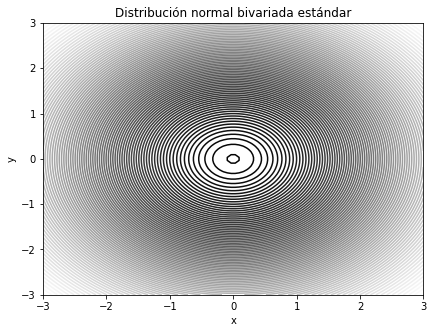

In [35]:
plot_contour(X,Y,Z)

Una visualización más interesante la podemos lograr utlizando [mplot3d](https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html):

In [36]:
def plot_multivariate_distribution(X,Y,Z,title="",color="black",lenght=15,width=7):
    fig = plt.figure(figsize=(lenght, width))
    
    ax = plt.axes(projection="3d")
    ax.plot_wireframe(X, Y, Z, color=color)
    
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.view_init(20, 20)
    
    plt.show()

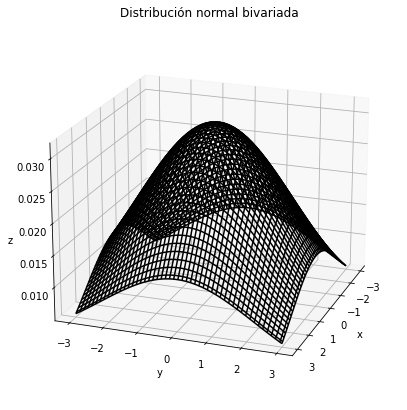

In [37]:
plot_multivariate_distribution(X,Y,Z,title="Distribución normal bivariada")

3.1) ¿Qué ocurre graficamente al disminuir las varianzas de una variable aleatoria normal bivariada? Explique **(5 pts.)**

**Respuesta:**

3.2) ¿Qué ocurre graficamente al aumentar las covarianzas de una variable aleatoria normal bivariada? Explique **(5 pts.)**

**Respuesta:**

Un proceso similar podemos realizar para visualizar una distribución multinomial:

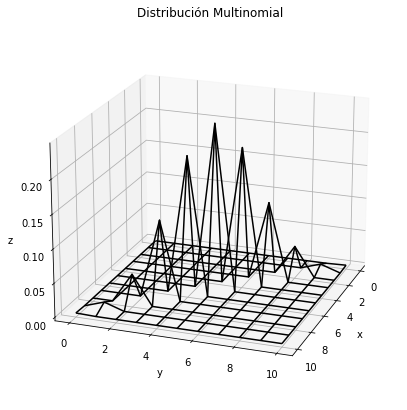

In [38]:
n = 10
M = sp.multinomial(n,[0.5,0.5])

X,Y = np.meshgrid(np.arange(0, n + 1), np.arange(0, n + 1))
z = np.array([M.pmf([x,y]) for x,y in zip(X.flatten(), Y.flatten())])
Z = z.reshape(X.shape)
    
plot_multivariate_distribution(X,Y,Z,title="Distribución Multinomial")

3.3) ¿Por qué tan pocos pares $(x,y)$ de la malla tienen asociado una probabilidad distinta de 0? **(5 pts.)** 

**Respuesta:** 

3.4) ¿Por qué es de esperarse que pares cercanos a (5,5) tengan una alta probabilidad de ocurrencia? **(5 pts.)** 

**Respuesta:**

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8c020776-77d5-4c95-b1ae-b31cc4cb033c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>